# Introduction



This is my first personal and unguided project using Python.

After going through the Data Science Lab with [World Quant](https://www.wqu.edu/), I am doing this as a baby step to showcase what I have learned. Feel free to learn from me and, most especially, teach me.

I want to thank [Hugging Face](https://huggingface.co/) for the Pre-trained BERT Model.

I also want to thank [Clément Bisaillon](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) for the fake-and-real-news-dataset.

## Installing Required Libraries

In [1]:
import pandas as pd
from transformers import BertTokenizer
from tqdm import tqdm
!pip install -q pandas numpy scikit-learn transformers streamlit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
import streamlit as st
from transformers import BertTokenizer, BertForSequenceClassification
import matplotlib.pyplot as plt
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import os
import time
import joblib
from sklearn.metrics import classification_report
!pip install -q streamlit
!pip install -q pyngrok
from pyngrok import ngrok
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading Data Set

In [ ]:

fake_news_df = pd.read_csv('/content/drive/MyDrive/Projects/fake_and_real_news/Data/Fake.csv')
real_news_df = pd.read_csv('/content/drive/MyDrive/Projects/fake_and_real_news/Data/True.csv')


checking the data

In [ ]:
fake_news_df.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_news_df.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real_news_df.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
fake_news_df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# Joining the data

In [ ]:

# Add a new column to each DataFrame to indicate the label (fake or real)
fake_news_df['label'] = 'fake'
real_news_df['label'] = 'real'

real_news_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [ ]:
# Combine the DataFrames into a single DataFrame
data_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)
data_df.describe()


,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


Enconding real and fake into 1 and 0

In [ ]:
encoder = LabelEncoder()
data_df['label'] = encoder.fit_transform(data_df['label'])  # Real = 1, Fake = 0
data_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


#Split the Data

Divide the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_df['text'], data_df['label'], test_size=0.2, random_state=42
)


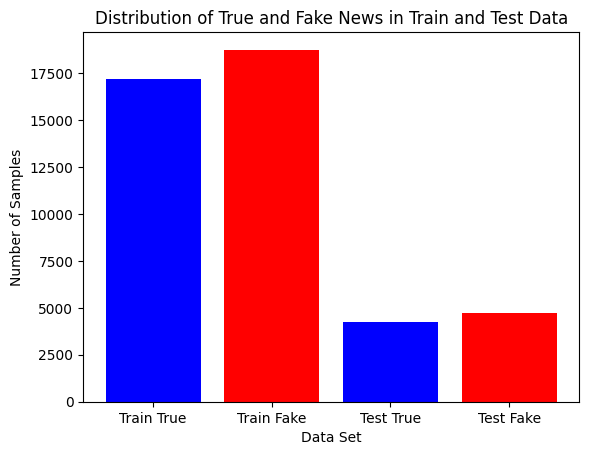

In [ ]:
# Count the number of true  and fake news in the training set
train_true_count = sum(y_train == 1)
train_fake_count = sum(y_train == 0)

# Count the number of true and fake news in the testing set
test_true_count = sum(y_test == 1)
test_fake_count = sum(y_test == 0)

# Create a bar chart
labels = ['Train True', 'Train Fake', 'Test True', 'Test Fake']
counts = [train_true_count, train_fake_count, test_true_count, test_fake_count]

plt.bar(labels, counts, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Data Set')
plt.ylabel('Number of Samples')
plt.title('Distribution of True and Fake News in Train and Test Data')
plt.show()


#Load Pre-trained BERT Model

Set the token directly

In [ ]:

os.environ['HF_TOKEN'] = ''


Load the BERT Tokenizer

In [ ]:


# Load pre-trained BERT tokenizer using the environment token
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', token=os.environ['HF_TOKEN'])

# Ensure X_train and X_test are in the correct format (list of strings)
X_train_texts = X_train.tolist()
X_test_texts = X_test.tolist()

# Function to tokenize text data in batches with a progress bar
def tokenize_data(texts, batch_size=32):
    encodings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Tokenizing"):
        batch_texts = texts[i:i+batch_size]
        batch_encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors='pt'
        )
        encodings.append(batch_encodings)
    return encodings

# Tokenize the training and testing data
train_encodings = tokenize_data(X_train_texts)
test_encodings = tokenize_data(X_test_texts)

# Flatten encodings list of dictionaries
train_encodings_dict = {key: torch.cat([batch[key] for batch in train_encodings]) for key in train_encodings[0]}
test_encodings_dict = {key: torch.cat([batch[key] for batch in test_encodings]) for key in test_encodings[0]}


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenizing: 100%|██████████| 281/281 [02:56<00:00,  1.59it/s]


Loading the BERT model

In [ ]:


# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=2
)

# Initialize the AdamW optimizer using PyTorch's implementation
optimizer = AdamW(model.parameters(), lr=5e-5)

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the available device (GPU or CPU)
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

#Train the Model

Preparing Data for PyTorch

In [ ]:


class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: tensor[idx] for key, tensor in self.encodings.items()}, self.labels[idx]

train_dataset = NewsDataset(train_encodings_dict, y_train.values)
test_dataset = NewsDataset(test_encodings_dict, y_test.values)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


Fine-tune the Model

In [ ]:


# Define number of epochs
num_epochs = 3  # You can adjust this value based on your needs

# Start timing
start_time = time.time()

# Training loop
model.train()
for epoch in range(num_epochs):
    # Initialize the progress bar for the current epoch
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for batch in progress_bar:
        # Clear gradients
        optimizer.zero_grad()

        # Move inputs and labels to the available device
        inputs = {k: v.to(device) for k, v in batch[0].items()}
        labels = batch[1].to(device)

        # Forward pass
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss  # Get loss

        # Backward pass
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Print epoch time
    print(f"Epoch {epoch+1} completed in {time.time() - start_time:.2f} seconds")

# Total training time
total_time = time.time() - start_time
print(f"Total training time: {total_time:.2f} seconds")


Epoch 1 completed in 3989.75 seconds


Epoch 2 completed in 7484.51 seconds


Epoch 3 completed in 10848.91 seconds
Total training time: 10848.91 seconds


loading Model

In [ ]:
model_path = "/content/drive/MyDrive/Projects/to/save/model_fake_real.pkl"
model = joblib.load(model_path)

# Evaluating the Model for Accuracy and Precision

In [ ]:

def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():  # Disable gradient calculation
        for batch in tqdm(test_loader, desc="Evaluating", unit="batch"):
            inputs = {key: val.to('cuda') for key, val in batch[0].items()}
            labels = batch[1].to('cuda')

            outputs = model(**inputs)

            preds = torch.argmax(outputs.logits, axis=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    print(classification_report(true_labels, predictions))

evaluate_model(model, test_loader)


Evaluating: 100%|██████████| 562/562 [08:20<00:00,  1.12batch/s]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#Creating a Streamlit App

## Saving the Model and Tokenizer

In [ ]:

# Assuming `model` is your trained model and `tokenizer` is the tokenizer
model_path = "/content/drive/MyDrive/Projects/fake_and_real_news/model"
tokenizer_path = "/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer"

# Save the model
model.save_pretrained(model_path)

# Save the tokenizer
tokenizer.save_pretrained(tokenizer_path)


('/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer/vocab.txt',
 '/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer/added_tokens.json')

In [3]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Set the paths to your saved tokenizer and model directories
tokenizer_path = "/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer"
model_path = "/content/drive/MyDrive/Projects/fake_and_real_news/model"

# Load the tokenizer and model (using use_fast=False if necessary)
tokenizer = BertTokenizer.from_pretrained(tokenizer_path, use_fast=False)
model = BertForSequenceClassification.from_pretrained(model_path)

# Your news article text
news = (
   'In an astonishing revelation that has left experts and citizens alike in disbelief, confidential sources claim that a hidden alien base has been operating beneath the Nevada desert for decades. According to leaked internal documents and blurry satellite images, this underground facility is reportedly used by extraterrestrial beings to conduct experiments on human technology and weather manipulation. Insiders assert that the U.S. government has been in covert communication with these alien entities, exchanging advanced technology in return for undisclosed human resources. While several officials have dismissed the reports as elaborate conspiracy theories, independent whistleblowers insist that evidence—including purported video footage of unidentified flying objects landing at the base—strongly supports the claim. Critics argue that the entire narrative is based on manipulated data and false testimonies, yet an increasing number of citizens remain convinced that something extraordinary is unfolding right beneath our feet. Stay tuned for further developments on this story as more details emerge.'
)

# Tokenize the input text
inputs = tokenizer(news, return_tensors="pt", truncation=True, padding=True)

# Get the model's outputs
outputs = model(**inputs)

# Extract logits and determine the predicted label (assumes output shape [1, num_labels])
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=1).item()

# Map the predicted label to a human-readable string (adjust the mapping if necessary)
if predicted_class == 0:
    print("fake news")
else:
    print("not fake news")




fake news


## Loading the Model and Tokenizer

In [4]:
import streamlit as st
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Set the paths to your saved tokenizer and model directories
tokenizer_path = "/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer"
model_path = "/content/drive/MyDrive/Projects/fake_and_real_news/model"

# Load the tokenizer and model (using use_fast=False if necessary)
tokenizer = BertTokenizer.from_pretrained(tokenizer_path, use_fast=False)
model = BertForSequenceClassification.from_pretrained(model_path)

# Title of the web app
st.title("Fake News Detection")

# Input text box for the news article
news = st.text_area("Enter the news article text:")

# Button to perform prediction
if st.button("Detect Fake News"):
    if news:
        # Tokenize the input text
        inputs = tokenizer(news, return_tensors="pt", truncation=True, padding=True)

        # Get the model's outputs
        outputs = model(**inputs)

        # Extract logits and determine the predicted label (assumes output shape [1, num_labels])
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

        # Map the predicted label to a human-readable string (adjust the mapping if necessary)
        if predicted_class == 0:
            st.write("Prediction: **Fake News**")
        else:
            st.write("Prediction: **Not Fake News**")
    else:
        st.write("Please enter some text to analyze.")

# Instructions for the user
st.write("Enter a news article in the text box above and click the 'Detect Fake News' button to find out if it's fake or not.")


2025-02-14 09:50:22.832 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 09:50:24.238 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-14 09:50:24.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 09:50:24.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 09:50:24.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 09:50:24.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 09:50:24.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 09:50:24.440 Session state does not 

In [5]:
# Create and write the Streamlit app code to a file named `app.py`
app_code = """
import streamlit as st
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm

# Load tokenizer and model from the specified paths
tokenizer_path = "/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer"
model_path = "/content/drive/MyDrive/Projects/fake_and_real_news/model"

tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Streamlit app title
st.title("Fake News Detection")

# User input text area
user_input = st.text_area("Enter News Text")

# Predict button
if st.button("Predict"):
    with st.spinner('Processing...'):
        # Add a progress bar
        progress_bar = st.progress(0)

        for i in tqdm(range(1, 101), desc="Progress", unit="%"):
            # Simulate some work being done
            st.sleep(0.01)  # Adjust the sleep time as needed
            progress_bar.progress(i)

        # Tokenize the input and make a prediction
        inputs = tokenizer(user_input, return_tensors='pt', truncation=True, padding=True)
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits).item()
        label = "Real" if prediction == 1 else "Fake"

        # Update progress bar to 100%
        progress_bar.progress(100)

        # Display the result
        st.write(f"The news is: {label}")
"""

# Save the code to `app.py` in the specified directory
with open('/content/drive/MyDrive/Projects/fake_and_real_news/app.py', 'w') as file:
    file.write(app_code)


In [9]:
# Replace 'your_authtoken_here' with your actual authtoken
ngrok.set_auth_token("")

In [7]:
app_code = """
import streamlit as st
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm
import time

# Load tokenizer and model from the specified paths
tokenizer_path = "/content/drive/MyDrive/Projects/fake_and_real_news/tokenizer"
model_path = "/content/drive/MyDrive/Projects/fake_and_real_news/model"

tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Streamlit app title
st.title("Fake News Detection AI")
st.write("Enter a news article below to check its authenticity.")

# User input text area
user_input = st.text_area("Enter News Text")

# Predict button
if st.button("Tell me"):
    with st.spinner('Processing...'):
        # Add a progress bar
        progress_bar = st.progress(0)

        for i in tqdm(range(1, 101), desc="Progress", unit="%"):
            # Simulate some work being done
            time.sleep(0.01)  # Adjust the sleep time as needed
            progress_bar.progress(i)

        # Tokenize the input and make a prediction
        inputs = tokenizer(user_input, return_tensors='pt', truncation=True, padding=True)
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits).item()
        label = "Real" if prediction == 1 else "Fake"

        # Update progress bar to 100%
        progress_bar.progress(100)

        # Display the result
        st.write(f"The news is: {label}")

"""

# Save the code to `app.py` in the specified directory
with open('/content/drive/MyDrive/Projects/fake_and_real_news/app.py', 'w') as file:
    file.write(app_code)


In [ ]:
# Start ngrok tunnel for Streamlit
public_url = ngrok.connect(addr="8501")
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run /content/drive/MyDrive/Projects/fake_and_real_news/app.py &


Streamlit app is live at: NgrokTunnel: "https://4c80-104-196-20-60.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.20.60:8501

2025-02-14 09:56:42.558982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739527002.588902    3964 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739527002.597629    3964 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 09:56:46.788 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/